[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ignaziogallo/data-mining/blob/aa20-21/tutorials/clustering/Elbow-method.ipynb)

# Elbow Method

In [27]:
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [28]:
centers_neat = [(-10, 10), (0, -5), (10, 5)]
X, _ = datasets.make_blobs(n_samples=100, 
                                centers=centers_neat,
                                cluster_std=2,
                                random_state=2)

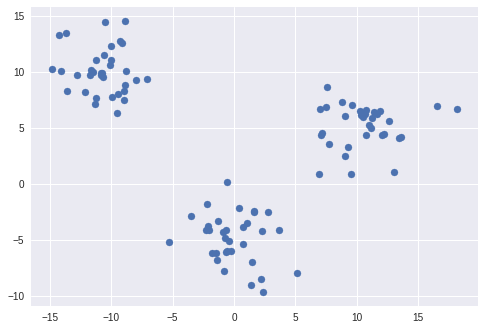

In [29]:
#Default plot params
plt.style.use('seaborn')

plt.scatter(X[:,0], X[:,1])

In [30]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=2)
clusters = km.fit_predict(X)

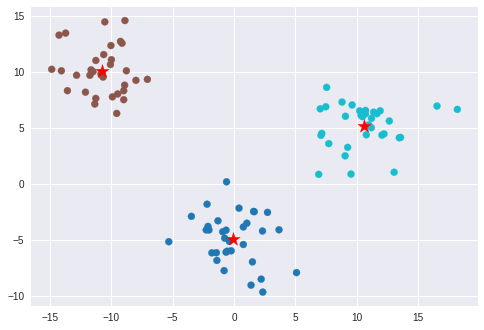

In [34]:
plt.scatter(X[:,0], X[:,1], c=clusters, cmap='tab10')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker="*", c="red", s=200)

Given a set of observations $(x_1, x_2, ..., x_n)$, where each observation is a d-dimensional real vector, k-means clustering aims to partition the $n$ observations into $k (\leq n)$ sets $S = \{S_1, S_2, ..., S_k\}$ so as to minimize the within-cluster sum of squares (WCSS) (i.e. variance).  
Formally, the objective is to find:

WCSS = $\sum_{i=1}^k \sum_{x\in S_i}(x- \mu_i)^2$

In [66]:
import numpy as np

In [91]:
def within_css(lkm):
    wcss = 0
    labels = set(lkm.labels_)
    for c in labels:
        cluster0 = X[lkm.labels_ == c]
        centroid0 = cluster0.mean(axis=0)
        sc = np.sum((cluster0 - centroid0) ** 2)
        wcss = wcss + sc
    return wcss

inertia_ 12445.448908126145
wcss 12445.448908126145
inertia_ 4447.127919041077
wcss 4447.127919041079
inertia_ 900.1054539699919
wcss 900.1054539699919
inertia_ 773.8333867494118
wcss 773.8333867494119
inertia_ 655.8316505242277
wcss 655.8316505242278
inertia_ 559.2051294882169
wcss 559.2051294882169
inertia_ 480.5168164502801
wcss 480.51681645028015
inertia_ 406.42083793097487
wcss 406.4208379309749
inertia_ 357.3221800645372
wcss 357.32218006453724
inertia_ 305.50182247767634
wcss 305.50182247767646


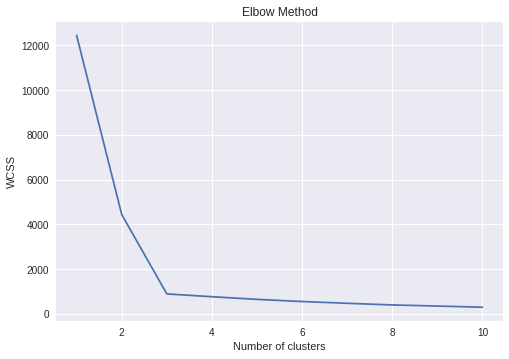

In [92]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia_ is sum of squared distance of samples to its closest cluster centers.
    wcss.append(kmeans.inertia_)
    print("inertia_", kmeans.inertia_)
    print("wcss", within_css(kmeans))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()